In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold
import scipy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [75]:
# 価格を生成する関数
def create_price(M, d, t):
    price = np.random.randint(d, t * d, size=M)
    return price

In [76]:
# alphaを作成する関数
def alpha_star(M):
    alpha_star = np.random.uniform(100, 200, size=M)
    return alpha_star

In [77]:
# betaを作成する関数
def beta_star(M, M_prime):
    """
    Generate true regression coefficients beta^{(m)*}_{m'} based on the given conditions.

    Parameters:
        M (int): Number of m indices.
        M_prime (int): Number of m' indices.

    Returns:
        numpy.ndarray: Array of generated coefficients with shape (M, M_prime, 3).
    """
    beta_star = np.zeros((M, M_prime, 3))

    for m in range(M):
        for m_prime in range(M_prime):
            if m == m_prime:
                beta_star[m, m_prime] = np.random.normal(-1, 1, 3)
            else:
                beta_star[m, m_prime] = np.random.normal(1, 1, 3)

    return beta_star

In [78]:
# phi関数
def phi(price, beta):
    phi = beta[0] * price + beta[1] * price**2 + beta[2] * (1 / price)
    return phi

In [79]:
M = 50
d = 100
t = 10
# このデータにおけるalpha,betaを作成
alpha = alpha_star(M)
beta = beta_star(M, M)


In [80]:
sigma = 1
# 価格を入れるリストを作成
price_list = []
# 量を入れるリストを作成
quantity_list = []
for i in range(10000):
    price = create_price(M, d, t)
    price_list.append(price)
    quantity = []
    for m in range(M):
        sum_beta = 0
        for m_prime in range(M):
            sum_beta += phi(price[m], beta[m][m_prime])
        quantity.append(alpha[m] + sum_beta + np.random.normal(0, sigma, size=1))
    quantity_list.append(sum(quantity))

In [81]:
# 列名の作成
column_names = [f"prodact_{i+1}" for i in range(M)]

In [82]:
# データフレームの作成
df_price = pd.DataFrame(price_list, columns=column_names)

In [83]:
df_price.head()

,prodact_1,prodact_2,prodact_3,prodact_4,prodact_5,prodact_6,prodact_7,prodact_8,prodact_9,prodact_10,...,prodact_41,prodact_42,prodact_43,prodact_44,prodact_45,prodact_46,prodact_47,prodact_48,prodact_49,prodact_50
0,823,587,682,740,508,443,577,939,422,921,...,603,992,526,678,260,209,533,116,153,618
1,233,915,709,719,492,913,807,598,480,174,...,364,601,475,919,394,461,999,855,691,355
2,393,641,581,497,514,239,605,473,858,404,...,656,913,637,192,728,374,453,865,456,576
3,595,637,460,437,111,164,986,749,496,638,...,234,759,814,250,958,658,247,540,688,156
4,493,580,432,921,484,364,162,309,234,921,...,173,983,183,877,902,481,545,386,771,527


In [84]:
# 売上の追加
df_price["sales"] = quantity_list

In [85]:
df_price.head()

,prodact_1,prodact_2,prodact_3,prodact_4,prodact_5,prodact_6,prodact_7,prodact_8,prodact_9,prodact_10,...,prodact_42,prodact_43,prodact_44,prodact_45,prodact_46,prodact_47,prodact_48,prodact_49,prodact_50,sales
0,823,587,682,740,508,443,577,939,422,921,...,992,526,678,260,209,533,116,153,618,[704794397.9777167]
1,233,915,709,719,492,913,807,598,480,174,...,601,475,919,394,461,999,855,691,355,[853932986.9833974]
2,393,641,581,497,514,239,605,473,858,404,...,913,637,192,728,374,453,865,456,576,[798996696.9243987]
3,595,637,460,437,111,164,986,749,496,638,...,759,814,250,958,658,247,540,688,156,[1005274537.8607203]
4,493,580,432,921,484,364,162,309,234,921,...,983,183,877,902,481,545,386,771,527,[778456376.9351684]


In [86]:
# 売上をfloat型に変換
df_price["sales"] = df_price["sales"].astype(float)

In [87]:
# 確認
df_price.dtypes

prodact_1       int32
prodact_2       int32
prodact_3       int32
prodact_4       int32
prodact_5       int32
prodact_6       int32
prodact_7       int32
prodact_8       int32
prodact_9       int32
prodact_10      int32
prodact_11      int32
prodact_12      int32
prodact_13      int32
prodact_14      int32
prodact_15      int32
prodact_16      int32
prodact_17      int32
prodact_18      int32
prodact_19      int32
prodact_20      int32
prodact_21      int32
prodact_22      int32
prodact_23      int32
prodact_24      int32
prodact_25      int32
prodact_26      int32
prodact_27      int32
prodact_28      int32
prodact_29      int32
prodact_30      int32
prodact_31      int32
prodact_32      int32
prodact_33      int32
prodact_34      int32
prodact_35      int32
prodact_36      int32
prodact_37      int32
prodact_38      int32
prodact_39      int32
prodact_40      int32
prodact_41      int32
prodact_42      int32
prodact_43      int32
prodact_44      int32
prodact_45      int32
prodact_46

In [88]:
# salesを整数に変換四捨五入
df_price["sales"] = df_price["sales"].round()

In [89]:
# データの確認
df_price.head()

,prodact_1,prodact_2,prodact_3,prodact_4,prodact_5,prodact_6,prodact_7,prodact_8,prodact_9,prodact_10,...,prodact_42,prodact_43,prodact_44,prodact_45,prodact_46,prodact_47,prodact_48,prodact_49,prodact_50,sales
0,823,587,682,740,508,443,577,939,422,921,...,992,526,678,260,209,533,116,153,618,7.047944e+08
1,233,915,709,719,492,913,807,598,480,174,...,601,475,919,394,461,999,855,691,355,8.539330e+08
2,393,641,581,497,514,239,605,473,858,404,...,913,637,192,728,374,453,865,456,576,7.989967e+08
3,595,637,460,437,111,164,986,749,496,638,...,759,814,250,958,658,247,540,688,156,1.005275e+09
4,493,580,432,921,484,364,162,309,234,921,...,983,183,877,902,481,545,386,771,527,7.784564e+08


In [90]:
X = df_price[column_names]

In [91]:
Y = df_price["sales"]

In [92]:
# XとYを学習用とテスト用に分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [93]:
# モデルの作成
lr = LinearRegression()

In [94]:
# テストデータを用いてモデルを学習
lr.fit(X_train, Y_train)

LinearRegression()

In [95]:
# テストデータを用いて予測
Y_pred = lr.predict(X_test)

In [96]:
# 予測結果の精度を確認
print(mean_squared_error(Y_test, Y_pred))

428575699870453.25


In [97]:
# モデルの係数を確認
lr.coef_

array([42920.47736944, 47793.1961078 , 50506.68244837, 65480.53635603,
       62132.17578909, 49825.72884653, 60065.15649331, 60404.71861578,
       50570.88016989, 54809.31514621, 47339.92242897, 40527.04318796,
       61513.56138163, 60413.69634806, 49033.0039036 , 63748.74586535,
       68498.62335382, 50593.92110439, 44734.86024214, 57615.90960645,
       43543.37123292, 47442.57969264, 53547.51673194, 40276.08217451,
       63077.89111567, 54741.543581  , 44110.74912957, 43590.02379732,
       59270.67137217, 58311.73057751, 55692.69501264, 55256.12511426,
       58034.078375  , 60562.25459507, 51946.96461785, 56384.20642982,
       38278.03961709, 52039.19185497, 43092.8925748 , 43161.7023293 ,
       29164.62220536, 54917.76606838, 50186.81473837, 40583.38662046,
       56162.76738046, 42567.12080115, 56472.39358521, 72319.18414375,
       58071.07877013, 50628.58626075])

In [98]:
# 目的関数の定義（売上の負の値を返す）
def objective_function(prices, coef, intercept):
    # 価格に基づく売上の予測
    sales = np.dot(prices, coef) + intercept

    # 売上を最大化するために、負の値を返す（minimizeは最小化を行うため）
    return -sales

In [99]:
# 初期価格（例えば、各製品の初期価格を100とする）
initial_prices = np.full(M, 100)

In [100]:
# 線形回帰モデルの係数とバイアスを取得
coef_lr = lr.coef_
intercept_lr = lr.intercept_

In [101]:
objective_function(initial_prices, coef_lr, intercept_lr)

295698130.4503845

In [102]:
# Nelder-Mead法を用いて最適化
result = minimize(
    objective_function,
    initial_prices,
    args=(coef_lr, intercept_lr),
    method="Nelder-Mead",
    bounds=[(d, d * t)] * M,
    options={"adaptive": True},
)

# 最適化された価格
optimal_prices = result.x

print("Optimal Prices:", optimal_prices)

Optimal Prices: [1000.         1000.         1000.         1000.          999.99299446
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
  999.99815199 1000.         1000.         1000.         1000.
 1000.         1000.         1000.          999.99264935 1000.        ]


In [103]:
optimal_sales = np.dot(optimal_prices, coef_lr) + intercept_lr
print("Optimal Sales:", optimal_sales)

Optimal Sales: 2064066920.2619123


In [104]:
def sales_function(price, alpha, beta, phi, sigma):
    M = len(price)
    total_sales = 0

    for m in range(M):
        sum_beta = 0
        for m_prime in range(M):
            sum_beta += phi(price[m], beta[m][m_prime])

        quantity = alpha[m] + sum_beta + np.random.normal(0, sigma)
        total_sales += quantity

    return total_sales

In [105]:
def true_objective_function(price, alpha, beta, sigma):
    # 売上の負の値を返す（売上を最大化するため）
    return -sales_function(price, alpha, beta, phi, sigma)

In [106]:
# 最適化の実行
result = minimize(
    true_objective_function,
    initial_prices,
    args=(alpha, beta, sigma),
    method="Nelder-Mead",
    bounds=[(d, t * d)] * M,
    options={"adaptive": True},
)

# 最適化された価格
true_optimal_prices = result.x

print("Optimal Prices:", optimal_prices)

# 最適化された価格での売上
true_optimal_sales = -result.fun
print("Optimal Sales:", optimal_sales)

Optimal Prices: [1000.         1000.         1000.         1000.          999.99299446
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
 1000.         1000.         1000.         1000.         1000.
  999.99815199 1000.         1000.         1000.         1000.
 1000.         1000.         1000.          999.99264935 1000.        ]
Optimal Sales: 2064066920.2619123


In [107]:
# optimal_pricesでのtrue_objective_functionの値
dash_sales = -true_objective_function(optimal_prices, alpha, beta, sigma)
dash_sales

2389364878.3166366

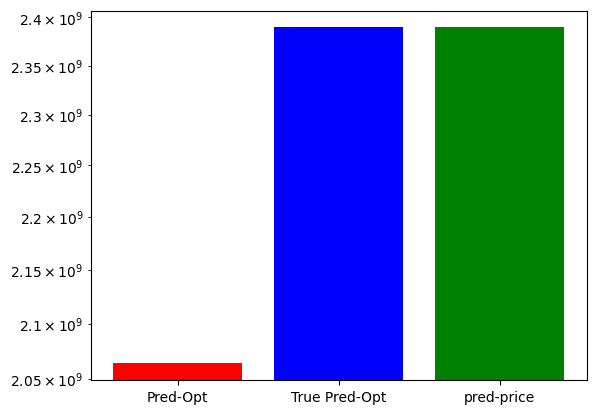

In [108]:
# optimal_salesとtrue_optimal_salesの比較(棒グラフ)(対数軸)

# 色を変更
plt.bar(
    ["Pred-Opt", "True Pred-Opt", "pred-price"],
    [optimal_sales, true_optimal_sales, dash_sales],
    color=["red", "blue", "green"],
)
plt.yscale("log")
plt.savefig("first.jpg", dpi=300)
plt.show()

In [118]:
# kfoldでデータを5分割
kf = KFold(n_splits=5, shuffle=True, random_state=0)
lr_kf_tilde = LinearRegression()
lr_kf_hat = LinearRegression()
low_cv_5 = []
for train_index, test_index in kf.split(X):
    # データを学習用とテスト用に分割
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    # theta_tildeを学習
    lr_kf_tilde.fit(X_train, Y_train)
    # 線形回帰モデルの係数とバイアスを取得
    coef_lr_tilde = lr_kf_tilde.coef_
    intercept_lr_tilde = lr_kf_tilde.intercept_
    # Nelder-Mead法を用いて最適化
    result = minimize(
        objective_function,
        initial_prices,
        args=(coef_lr_tilde, intercept_lr_tilde),
        method="Nelder-Mead",
        bounds=[(d, d * t)] * M,
        options={"adaptive": True},
    )
    # 最適化された価格
    optimal_prices_kf = result.x
    # theta_hatを学習
    lr_kf_hat.fit(X_train, Y_train)
    # 線形回帰モデルの係数とバイアスを取得
    coef_lr_hat = lr_kf_hat.coef_
    intercept_lr_hat = lr_kf_hat.intercept_
    # optimal_prices,coef_lr_hat,intercept_lr_hatをobjective_functionに代入
    low_cv_5.append(-objective_function(optimal_prices_kf, coef_lr_hat, intercept_lr_hat))

# 5分割したデータの平均
lowcv_5 = np.mean(low_cv_5)
print(lowcv_5)


2064379872.817138


In [119]:
print(optimal_sales)

2064066920.2619123


In [120]:
# kfoldでデータを10分割
kf = KFold(n_splits=10, shuffle=True, random_state=0)
lr_kf_tilde = LinearRegression()
lr_kf_hat = LinearRegression()
low_cv_10 = []
for train_index, test_index in kf.split(X):
    # データを学習用とテスト用に分割
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    # theta_tildeを学習
    lr_kf_tilde.fit(X_train, Y_train)
    # 線形回帰モデルの係数とバイアスを取得
    coef_lr_tilde = lr_kf_tilde.coef_
    intercept_lr_tilde = lr_kf_tilde.intercept_
    # Nelder-Mead法を用いて最適化
    result = minimize(
        objective_function,
        initial_prices,
        args=(coef_lr_tilde, intercept_lr_tilde),
        method="Nelder-Mead",
        bounds=[(d, d * t)] * M,
        options={"adaptive": True},
    )
    # 最適化された価格
    optimal_prices_kf = result.x
    # theta_hatを学習
    lr_kf_hat.fit(X_train, Y_train)
    # 線形回帰モデルの係数とバイアスを取得
    coef_lr_hat = lr_kf_hat.coef_
    intercept_lr_hat = lr_kf_hat.intercept_
    # optimal_prices,coef_lr_hat,intercept_lr_hatをobjective_functionに代入
    low_cv_10.append(-objective_function(optimal_prices_kf, coef_lr_hat, intercept_lr_hat))

# 5分割したデータの平均
lowcv_10 = np.mean(low_cv_10)
print(lowcv_10)


2064365049.0089593


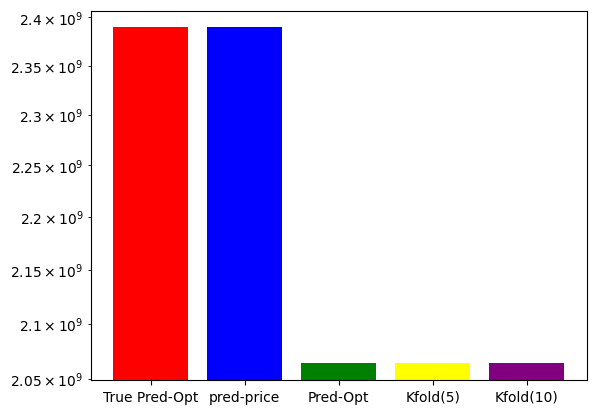

In [121]:
# 色を変更
plt.bar(
    ["True Pred-Opt", "pred-price", "Pred-Opt", "Kfold(5)", "Kfold(10)"],
    [true_optimal_sales, dash_sales, optimal_sales, lowcv_5, lowcv_10],
    color=["red", "blue", "green", "yellow", "purple"],
)
plt.yscale("log")
plt.savefig("first.jpg", dpi=300)
plt.show()
